In [1]:
import numpy as np
import pandas as po
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, precision_recall_fscore_support, precision_score, recall_score, make_scorer, classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, matthews_corrcoef, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = po.read_csv('/home/varun/Desktop/Projects/EnergyTheft/data/processed/EnergyConsumption_processed.csv')
X = df.drop(['FLAG'], axis=1)
y = df['FLAG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
def model_performance_DL(y_test, y_pred):
  #Different metrics are used to check the model performance
  #Weighted precision,recall,f1_score is reported for all models
  classes = np.unique(y_test)
  y_test_array = po.get_dummies(y_test, drop_first=False).values
  y_pred_array = po.get_dummies(y_pred, drop_first=False).values

  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:",  round(accuracy,2))
  #print("Auc:", round(auc,2))
  print("Detail:")
  print(classification_report(y_test, y_pred))

  ## Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots()
  sns.heatmap(cmn, annot=True, fmt='.2f', ax=ax, cmap='YlGnBu', 
            )
  ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
  plt.yticks(rotation=0)

  ## Plot roc-auc curve
  plt.figure()
  for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           y_pred_array[:,i])
    plt.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              auc(fpr, tpr),figsize=(20,20),cmap='YlGnBu',linestyle='--')
               )

  plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver operating characteristic')

  plt.legend(loc='best')
  plt.grid(True)
  
  ## Plot precision-recall curve
  plt.figure()
  for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
                 y_test_array[:,i], y_pred_array[:,i])
    plt.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  auc(recall, precision))
              )
  plt.xlim([0,1.05])
  plt.ylim([0,1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall curve')  
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()
  print("MCC = ", matthews_corrcoef(y_test, y_pred))
  print("MAP = ", average_precision_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7717
           1       0.71      0.12      0.21       758

    accuracy                           0.92      8475
   macro avg       0.82      0.56      0.58      8475
weighted avg       0.90      0.92      0.89      8475

average_precision_score =  0.16405208138752034


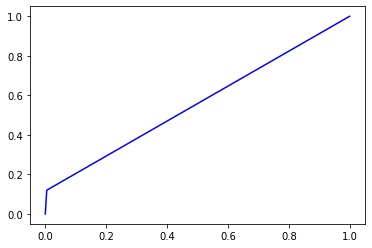

auc 0.5576290805722075


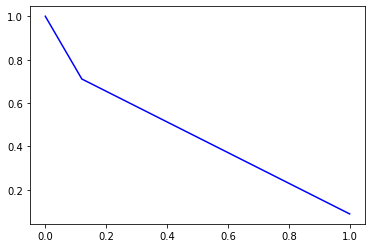

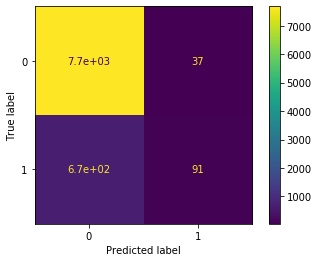

Accuracy: 0.92
Detail:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7717
           1       0.71      0.12      0.21       758

    accuracy                           0.92      8475
   macro avg       0.82      0.56      0.58      8475
weighted avg       0.90      0.92      0.89      8475



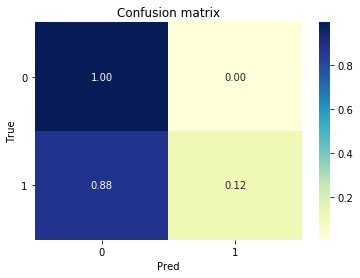

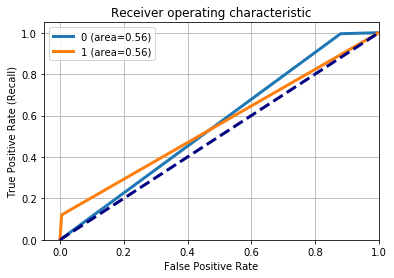

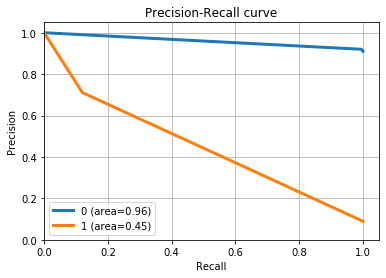

MCC =  0.2696872084112327
MAP =  0.16405208138752034


In [5]:
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7717
           1       0.22      0.27      0.24       758

    accuracy                           0.85      8475
   macro avg       0.58      0.59      0.58      8475
weighted avg       0.86      0.85      0.86      8475

average_precision_score =  0.12535070707216253


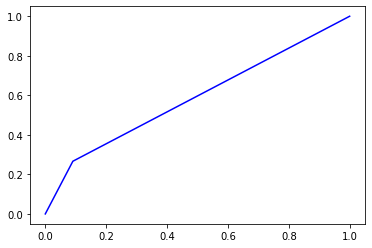

auc 0.5879557622669753


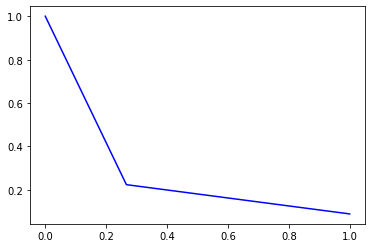

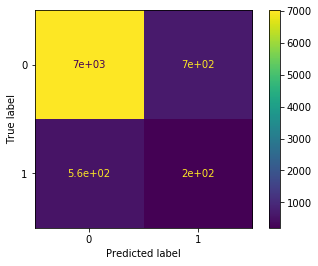

Accuracy: 0.85
Detail:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7717
           1       0.22      0.27      0.24       758

    accuracy                           0.85      8475
   macro avg       0.58      0.59      0.58      8475
weighted avg       0.86      0.85      0.86      8475



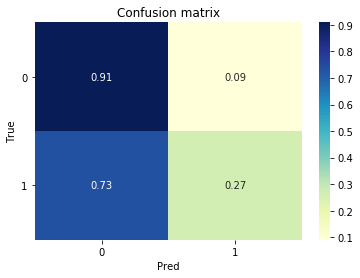

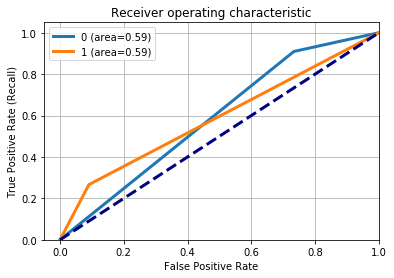

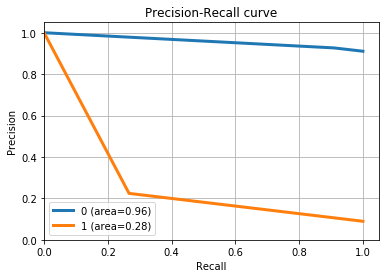

MCC =  0.16286512595352184
MAP =  0.12535070707216253


In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7717
           1       0.55      0.05      0.10       758

    accuracy                           0.91      8475
   macro avg       0.73      0.52      0.52      8475
weighted avg       0.88      0.91      0.88      8475

average_precision_score =  0.11363507828512143


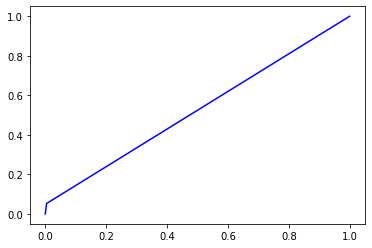

auc 0.5242470876928332


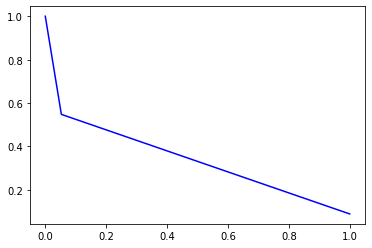

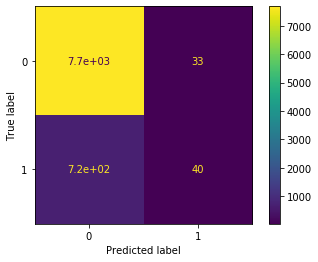

Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      7717
           1       0.55      0.05      0.10       758

    accuracy                           0.91      8475
   macro avg       0.73      0.52      0.52      8475
weighted avg       0.88      0.91      0.88      8475



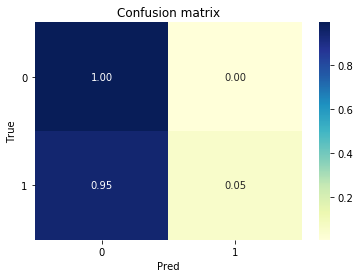

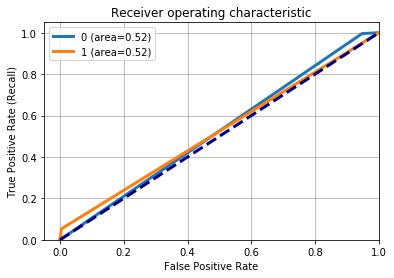

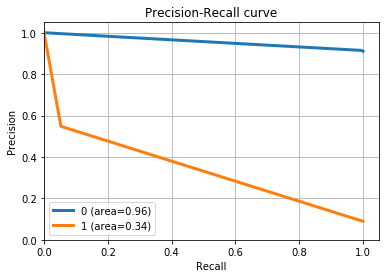

MCC =  0.14975994196387565
MAP =  0.11363507828512143


In [7]:
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7717
           1       0.34      0.19      0.24       758

    accuracy                           0.89      8475
   macro avg       0.63      0.58      0.59      8475
weighted avg       0.87      0.89      0.88      8475

average_precision_score =  0.13666481074474648


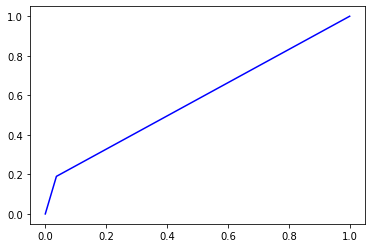

auc 0.5767154584180559


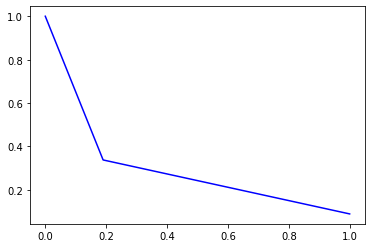

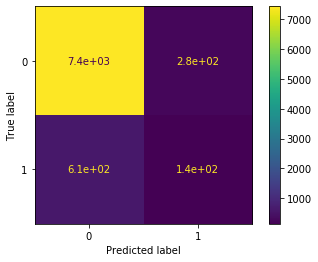

Accuracy: 0.89
Detail:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7717
           1       0.34      0.19      0.24       758

    accuracy                           0.89      8475
   macro avg       0.63      0.58      0.59      8475
weighted avg       0.87      0.89      0.88      8475



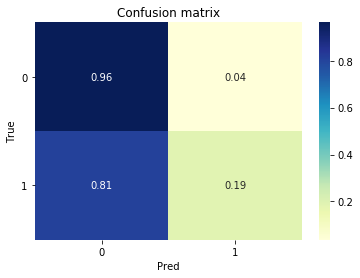

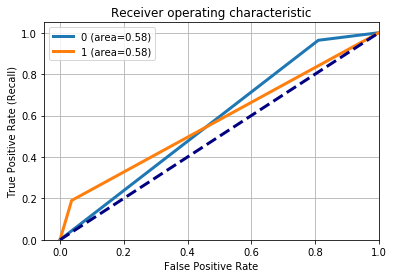

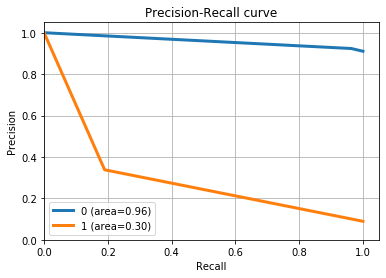

MCC =  0.20039919373144158
MAP =  0.13666481074474648


In [8]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

In [5]:
clf = SVC(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

In [4]:
clf = GradientBoostingClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("average_precision_score = ", average_precision_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='blue')
plt.show()
print("auc", auc(fpr, tpr))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='blue')
plt.show()
plt.close()
confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()
model_performance_DL(y_test, y_pred)

In [1]:
import numpy as np
import pandas as po
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import os
import argparse
import numpy as np
import tensorflow as tf
from utils import save_results, init_classifier, load_data

In [9]:
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score, average_precision_score, precision_recall_curve, precision_recall_fscore_support, precision_score, recall_score, make_scorer, classification_report, confusion_matrix, plot_confusion_matrix, accuracy_score, matthews_corrcoef, average_precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [4]:
def get_data(train_frac, val_frac, test_frac, PATH):	
	df = po.read_csv(PATH).sample(frac=1, random_state=42).reset_index(drop=True).fillna(0)
	
	X = df.drop(['FLAG'], axis=1)
	y = df['FLAG']

	print('Value counts for each class - ')
	print(y.value_counts())

	X_train = X[:int(train_frac*len(X))]
	y_train = y[:int(train_frac*len(X))]

	X_val   = X[int(train_frac*len(X)):int((train_frac+val_frac)*len(X))]
	y_val   = y[int(train_frac*len(X)):int((train_frac+val_frac)*len(X))]

	X_test  = X[int((train_frac+val_frac)*len(X)):int((train_frac+val_frac+test_frac)*len(X))]
	y_test  = y[int((train_frac+val_frac)*len(X)):int((train_frac+val_frac+test_frac)*len(X))]

	X_train = X_train.to_numpy()[:, :, np.newaxis]
	X_val   = X_val.to_numpy()[:, :, np.newaxis]
	X_test  = X_test.to_numpy()[:, :, np.newaxis]

	y_train = tf.keras.utils.to_categorical(y_train.to_numpy(), num_classes=2)
	y_val   = tf.keras.utils.to_categorical(y_val.to_numpy(), num_classes=2)
	y_test  = tf.keras.utils.to_categorical(y_test.to_numpy(), num_classes=2)

	return (X_train, y_train), (X_val, y_val), (X_test, y_test)

In [5]:
def model_performance_DL(y_test, y_pred):
  #Different metrics are used to check the model performance
  #Weighted precision,recall,f1_score is reported for all models
  classes = np.unique(y_test)
  y_test_array = y_test # po.get_dummies(y_test, drop_first=False).values
  y_pred_array = po.get_dummies(y_pred, drop_first=False).values
  y_test = np.argmax(y_test, axis=1)

  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:",  round(accuracy,2))
  #print("Auc:", round(auc,2))
  print("Detail:")
  print(classification_report(y_test, y_pred))

  ## Plot confusion matrix
  cm = confusion_matrix(y_test, y_pred)
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  fig, ax = plt.subplots()
  sns.heatmap(cmn, annot=True, fmt='.2f', ax=ax, cmap='YlGnBu', 
            )
  ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
  plt.yticks(rotation=0)

  ## Plot roc-auc curve
  plt.figure()
  for i in range(len(classes)):
    fpr, tpr, thresholds = roc_curve(y_test_array[:,i],  
                           y_pred_array[:,i])
    plt.plot(fpr, tpr, lw=3, 
              label='{0} (area={1:0.2f})'.format(classes[i], 
                              auc(fpr, tpr),figsize=(20,20),cmap='YlGnBu',linestyle='--')
               )

  plt.plot([0,1], [0,1], color='navy', lw=3, linestyle='--')
  plt.xlim([-0.05,1.0])
  plt.ylim([0,1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate (Recall)')
  plt.title('Receiver operating characteristic')

  plt.legend(loc='best')
  plt.grid(True)
  
  ## Plot precision-recall curve
  plt.figure()
  for i in range(len(classes)):
    precision, recall, thresholds = precision_recall_curve(
                 y_test_array[:,i], y_pred_array[:,i])
    plt.plot(recall, precision, lw=3, 
               label='{0} (area={1:0.2f})'.format(classes[i], 
                                  auc(recall, precision))
              )
  plt.xlim([0,1.05])
  plt.ylim([0,1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision-Recall curve')  
  plt.legend(loc="best")
  plt.grid(True)
  plt.show()

  print("MCC = ", matthews_corrcoef(y_test, y_pred))
  print("MAP = ", average_precision_score(y_test, y_pred))

In [6]:
model = 'lstmfcn'
os.makedirs('results_new/', exist_ok=True)

In [7]:
PATH = 'mean.csv'

(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_data(0.6, 0.2, 0.2, PATH)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

Value counts for each class - 
0    38757
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1034, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 1034)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       1058944     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 128)       512         conv1d[0][0]                     
________________

Accuracy: 0.92
Detail:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7749
           1       0.58      0.04      0.07       726

    accuracy                           0.92      8475
   macro avg       0.75      0.52      0.51      8475
weighted avg       0.89      0.92      0.88      8475



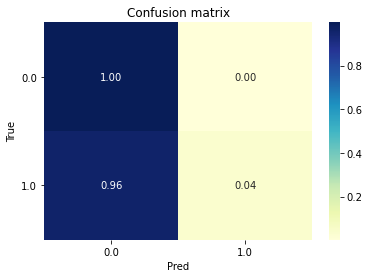

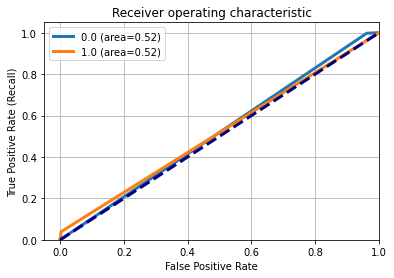

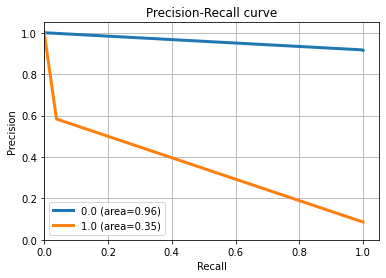

MCC =  0.13420658175937553
MAP =  0.10485758632178585


In [10]:
model_performance_DL(y_test, y_pred.argmax(axis=1))

Value counts for each class - 
0    38757
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1034, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 1034)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       1058944     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 128)       512         conv1d[0][0]                     
________________

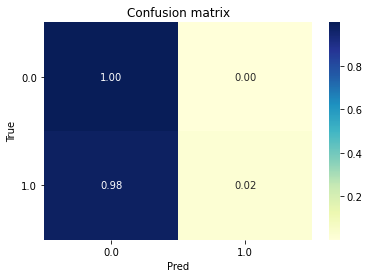

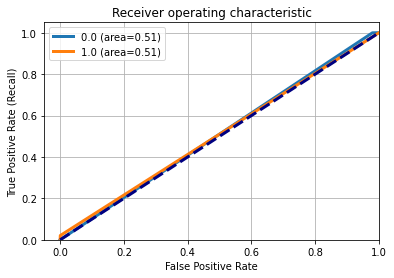

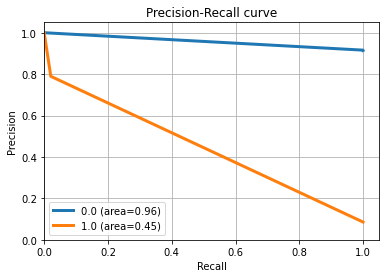

MCC =  0.11920604862074946
MAP =  0.10020524506615035


In [11]:
PATH = 'median.csv'

(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_data(0.6, 0.2, 0.2, PATH)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

model_performance_DL(y_test, y_pred.argmax(axis=1))

In [12]:
PATH = 'locf.csv'

(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_data(0.6, 0.2, 0.2, PATH)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

Value counts for each class - 
0    38757
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1034, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 1034)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       1058944     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 128)       512         conv1d[0][0]                     
________________

Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7749
           1       0.50      0.01      0.01       726

    accuracy                           0.91      8475
   macro avg       0.71      0.50      0.48      8475
weighted avg       0.88      0.91      0.87      8475



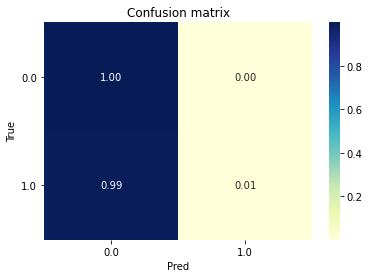

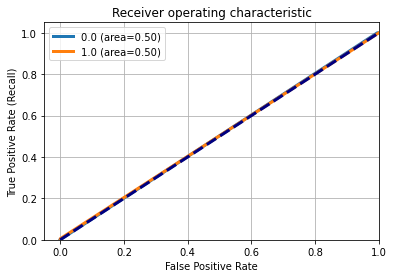

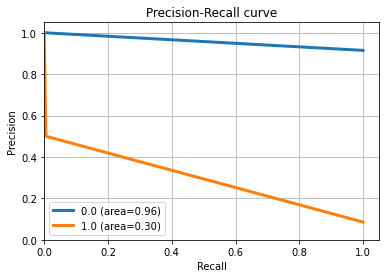

MCC =  0.04550737088483434
MAP =  0.08794656134961847


In [13]:
model_performance_DL(y_test, y_pred.argmax(axis=1))

In [14]:
PATH = 'interp.csv'

(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_data(0.6, 0.2, 0.2, PATH)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

Value counts for each class - 
0    38757
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2068, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 2068)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       2117760     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 128)       512         conv1d[0][0]                     
________________

Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7749
           1       0.60      0.00      0.01       726

    accuracy                           0.91      8475
   macro avg       0.76      0.50      0.48      8475
weighted avg       0.89      0.91      0.87      8475



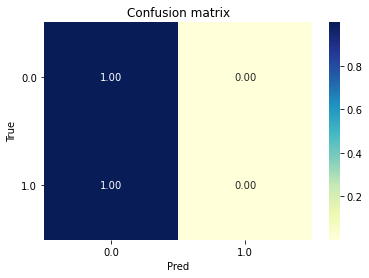

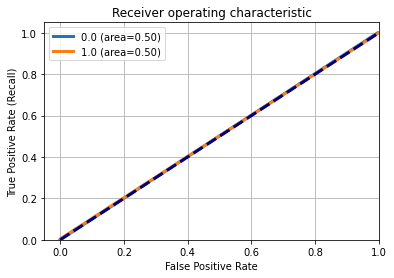

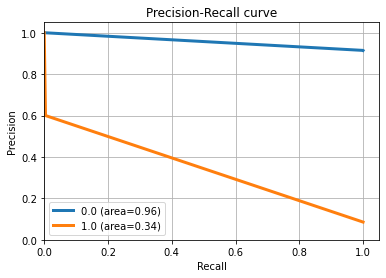

MCC =  0.04465180559310205
MAP =  0.08778907335624954


In [15]:
model_performance_DL(y_test, y_pred.argmax(axis=1))

In [16]:
PATH = 'spline.csv'

(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_data(0.6, 0.2, 0.2, PATH)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

Value counts for each class - 
0    38757
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2068, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 2068)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       2117760     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 128)       512         conv1d[0][0]                     
________________

Accuracy: 0.91
Detail:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96      7749
           1       1.00      0.00      0.00       726

    accuracy                           0.91      8475
   macro avg       0.96      0.50      0.48      8475
weighted avg       0.92      0.91      0.87      8475



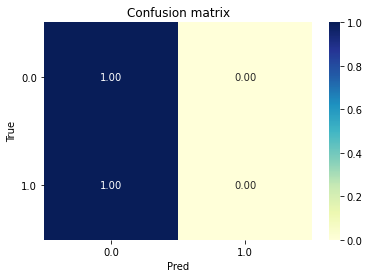

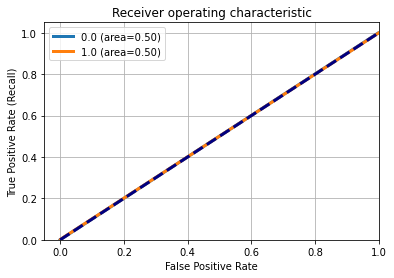

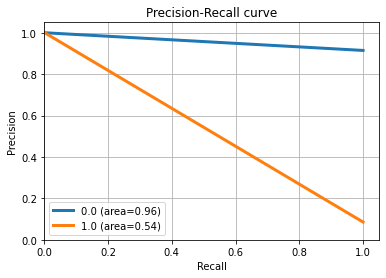

MCC =  0.03549035065003226
MAP =  0.08692313318218388


In [17]:
model_performance_DL(y_test, y_pred.argmax(axis=1))

In [18]:
from preprocessing import get_standard_data

In [19]:
PATH = 'edtwbi'

In [ ]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = get_standard_data(0.6, 0.2, 0.2)
outputs_dir = 'results_new/{}_/'.format(model, PATH.split('.')[0])
os.makedirs(outputs_dir, exist_ok=True)

input_shape = X_train.shape[1:]
nb_classes 	= 2
verbose 	= True

classifier = init_classifier(model, outputs_dir, input_shape,nb_classes, verbose)

hist = classifier.fit(X_train, y_train, X_val, y_val, batch_size=64)
y_pred = classifier.predict(X_test)

save_results(model, y_test, y_pred, hist.history, outputs_dir)

model_performance_DL(y_test, y_pred.argmax(axis=1))

Loading Standard Data with train_frac = 0.6, val_frac = 0.2 and test_frac = 0.2
Value counts for each class - 
0    20657
1     3615
Name: FLAG, dtype: int64
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1034, 1)]    0                                            
__________________________________________________________________________________________________
permute (Permute)               (None, 1, 1034)      0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1, 128)       1058944     permute[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (No